In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [1]:
import numpy as np
# Colab
# !apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# Gradient Boosting

- 사이킷런에서 제공하는 GradientBoostingClassifier와 GradientBoostingRegressor모두 DecisionTreeRegressor를 사용하여 구현되어 있다.

In [ ]:
# GradientBoostingClassifier?

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier() 

#### 그래디언트 부스팅의 파라미터
  - loss : 그래디언트 부스팅에 다른 비용 함수를 사용할 수 있다. 기본값은 로지스틱 손실 함수인 'deviance'이고 에이다부스트에서 사용하는 'exponential'도 있다.  
    - GradientBoostingRegressor에도 loss파라미터가 존재하는데 기본값은 'ls(최소제곱)'이고 'lad(최소 절댓값 오차)', 'huber(후버 손실함수)', 'quantile(사분위수 손실함수)'가 있다.
  - learning_rate : 에이다 부스트의 파라미터와 비슷하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 정해주는 파라미터이다. 기본값은 0.1이다.  
  - subsample : 각 트리가 훈련할 때 사용할 데이터의 비율을 지정한다. 'subsample = 0.3'이면 각 트리는 무작위로 선택된 30%의 훈련 데이터로 학습된다.
  - 결정 트리를 제어하는 파라미터인 'max_depth, min_samples_leaf' 등을 가지고 있다.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state = 0)

model_grad = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

In [5]:
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 1.000
test score : 0.965


- 훈련 점수가 1.0으로 과적합을 보이고 있다.

In [6]:
model_grad = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 0.991
test score : 0.972


- 과적합을 막기 위해서 트리의 깊이를 1로 설정했다. 모델의 점수를 확인해보니 훈련 점수는 낮아지고 테스트 점수는 높아진 것을 확인할 수 있다.

In [7]:
model_grad = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 0.988
test score : 0.965


- 학습률을 낮춰서도 과적합을 방지할 수 있다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


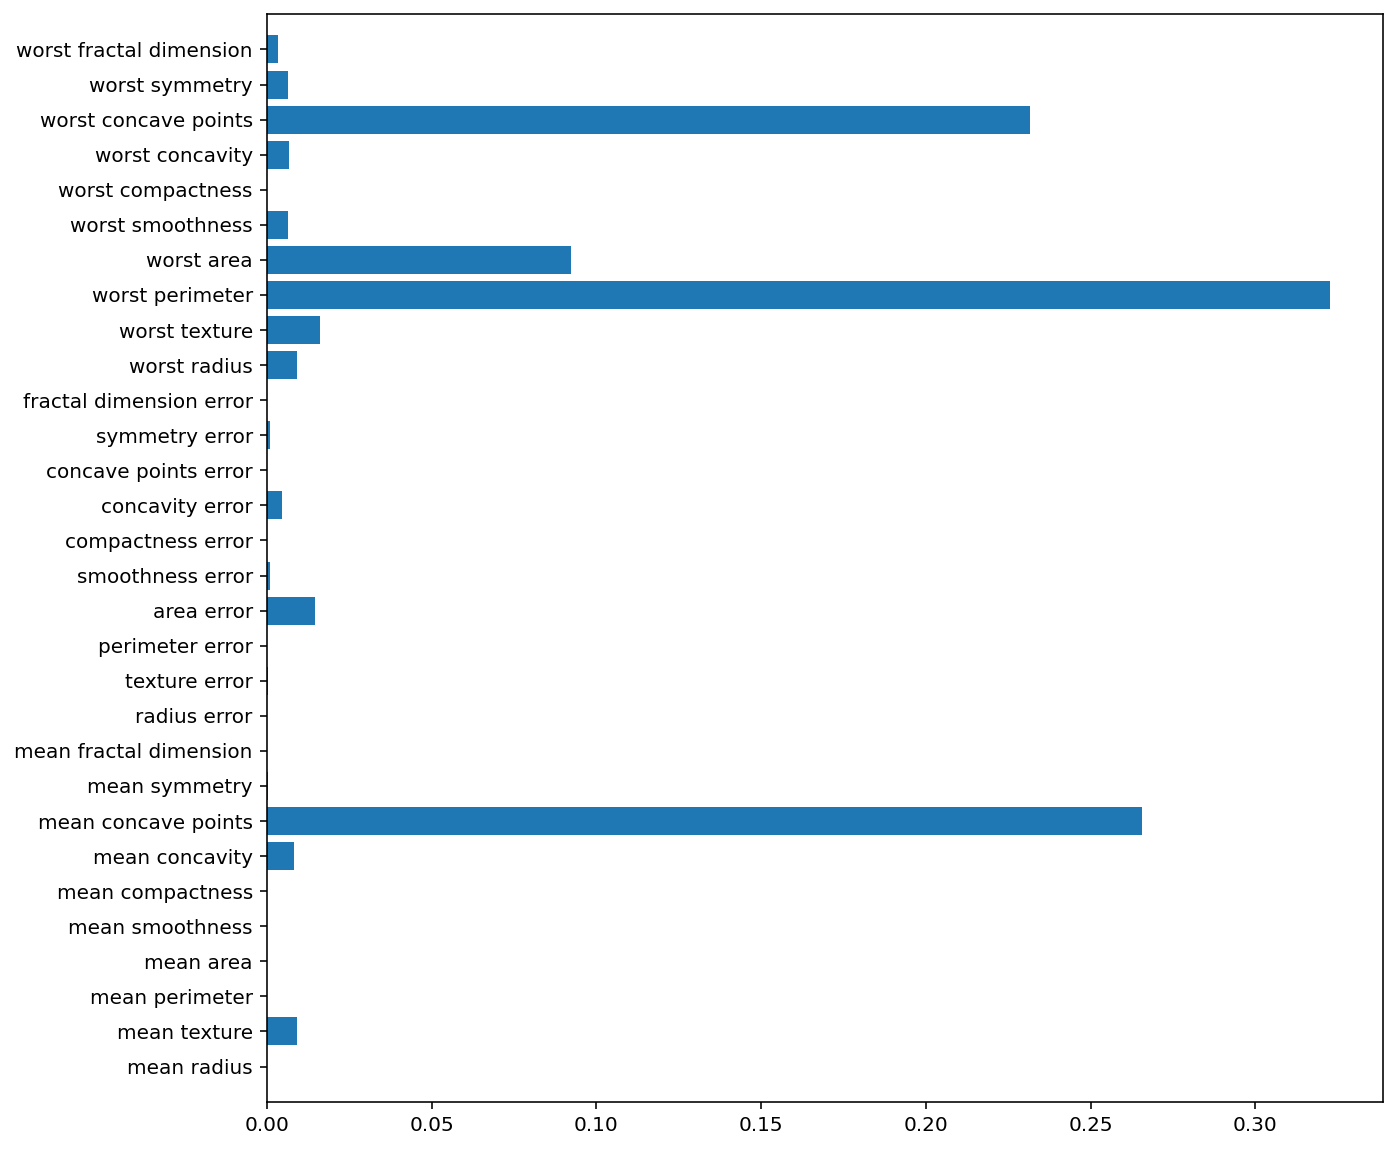

In [8]:
grbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y = grbc.feature_importances_
plt.barh(X, Y, align='center')
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.show()

- 몇몇 특성들을 완전히 무시하고 있는 것을 확인할 수 있다.

- 그래디언트 부스팅의 단점은 파라미터를 잘 조정해야 하며 훈련 시간이 다른 모델에 비해 길다.
- 그래디언트 부스팅은 n_estimators를 크게하면 모델이 복잡해져 과적합이 될 가능성이 크다. 적절한 n_estimaotrs와 learning_rate를 찾는것이 관건이다.